In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import KeyFunctions as me
import CritPointMR as mr
import AnalyticalNR as rf
import torch

import matplotlib as mlp

import warnings
warnings.filterwarnings("ignore")

mlp.rcParams['font.family'] = 'Nimbus Roman'
mlp.rcParams['figure.dpi']= 300
mlp.rcParams['axes.linewidth'] = 1.5
mlp.rcParams['ytick.major.width'] = 1
mlp.rcParams['xtick.major.width'] = 1

In [2]:
DataSet = 'DimJiaLi Unique'
EOS = "PR"
MxNmax = 23

In [3]:
dfarr = []
PDarr = []
ypredarr = []
MSEarr = np.zeros([MxNmax+1, 2])
MAEarr = np.zeros([MxNmax+1, 2])

path = 'TrainedModels/'
for i in range(MxNmax):
    df, PD, MSE, MAE, trainednn, ypred = mr.InitialModel(i, DataSet, EOS)
    MSEarr[i, :] = MSE
    MAEarr[i, :] = MAE
    dfarr.append(df)
    PDarr.append(PD)
    ypredarr.append(ypred)
    #torch.save(trainednn.state_dict(), path+'MX_'+str(i)+'.trh')
    

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
PDarr[0]

,Tc_PD,Pc_PD
0,7.141940e-04,0.004336
1,7.864419e-07,0.006331
2,1.355538e-03,0.001156
3,3.139438e-03,0.003473
4,9.856603e-04,0.010225
5,1.999846e-03,0.010787
6,2.262390e-03,0.003374
7,7.093218e-05,0.006836
8,6.169002e-04,0.000837
9,2.214675e-03,0.003381


Text(0.5, 0, 'Normalized Pressure')

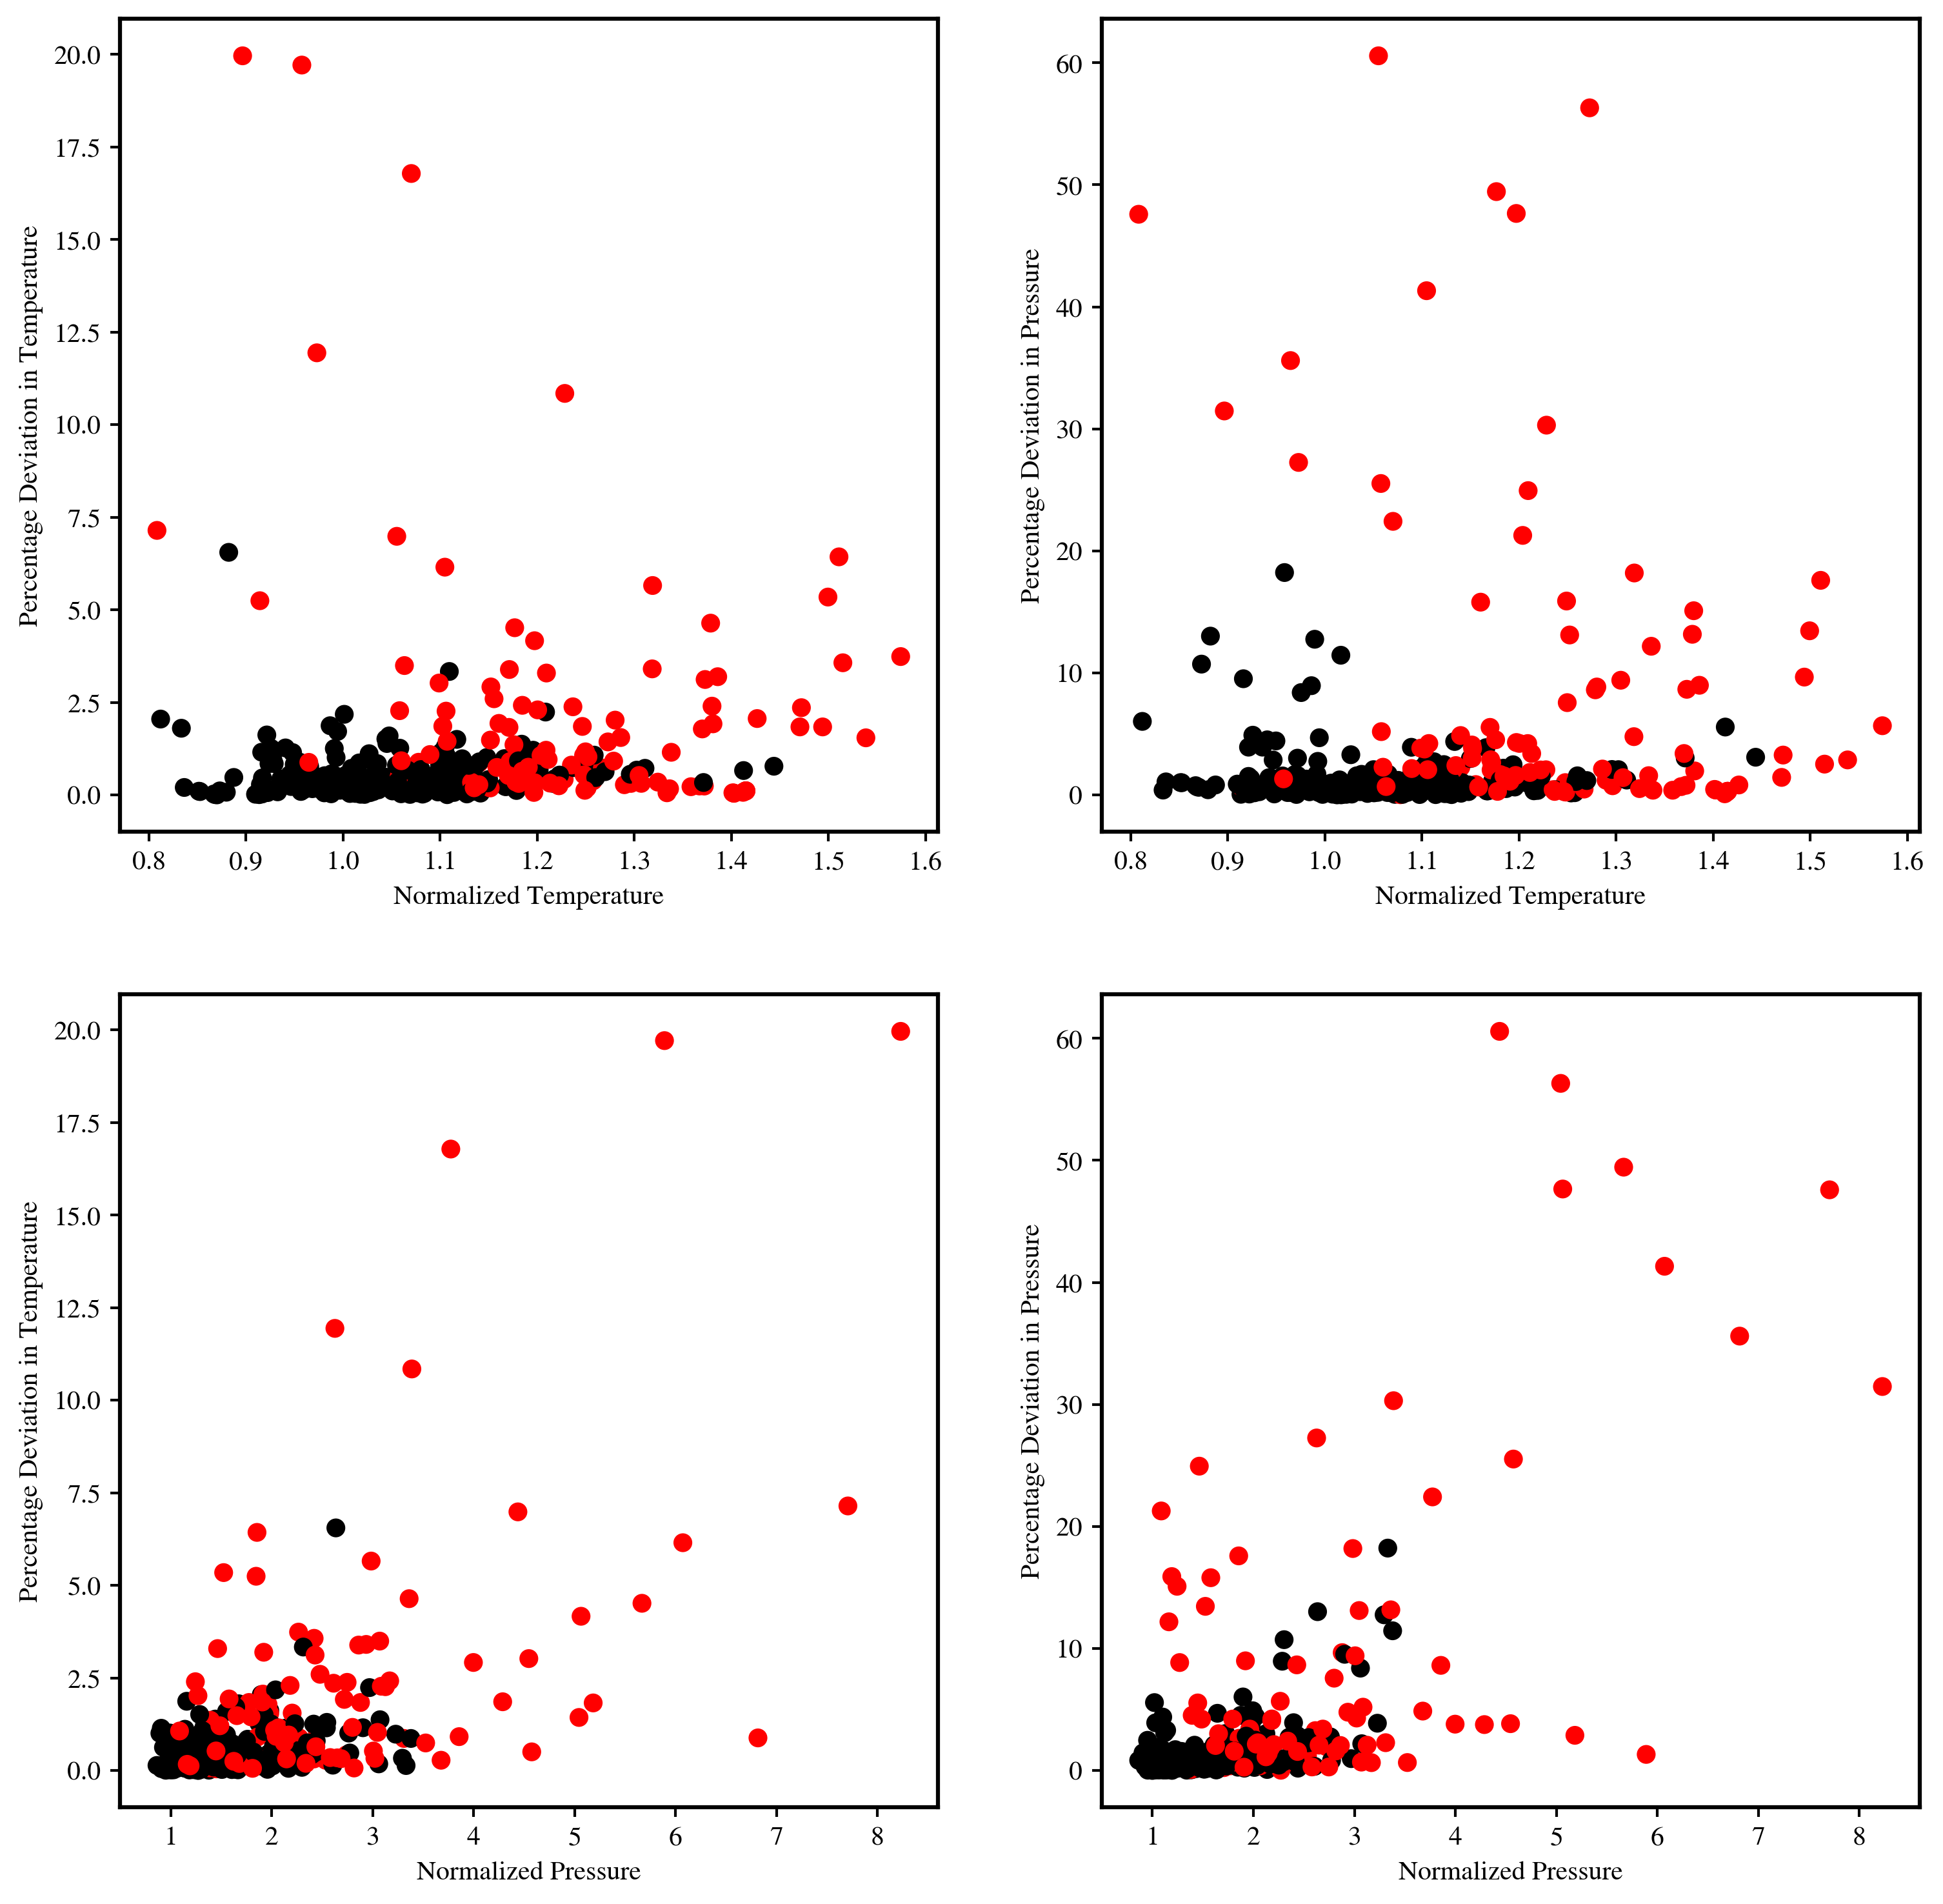

In [128]:
import matplotlib.colors as mplc

fig, ax = plt.subplots(2, 2, figsize = [12, 12])
PDtot = pd.concat(PDarr).reset_index(drop = True).to_numpy()*100
predtot = np.concatenate(ypredarr)


norm = mplc.Normalize(vmin=0, vmax=1, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.autumn_r)
clr = []
i = 0
for frame in dfarr:
    if 'Nitrogen' in frame.columns:
        for j in range(15):clr.append('r')
    else:
        for j in range(15):clr.append('k')
    i += 1
    
    
ax[0, 0].scatter(predtot[:, 0], PDtot[:,0], c = clr)
ax[0, 0].set_ylabel('Percentage Deviation in Temperature')
ax[0, 0].set_xlabel('Normalized Temperature')
ax[0, 1].scatter(predtot[:, 0], PDtot[:,1], c = clr)
ax[0, 1].set_ylabel('Percentage Deviation in Pressure')
ax[0, 1].set_xlabel('Normalized Temperature')
ax[1, 0].scatter(predtot[:, 1], PDtot[:,0], c = clr)
ax[1, 0].set_ylabel('Percentage Deviation in Temperature')
ax[1, 0].set_xlabel('Normalized Pressure')
ax[1, 1].scatter(predtot[:, 1], PDtot[:,1], c = clr)
ax[1, 1].set_ylabel('Percentage Deviation in Pressure')
ax[1, 1].set_xlabel('Normalized Pressure')




#x = np.linspace(0.8, 1.6)
#res = sp.stats.linregress(x = predtot[:, 0], y = PDtot[:, 0])
#y = res.slope*x + res.intercept
#ax[0, 0].plot(x, y, c = 'b', linestyle = '--', linewidth = 2)
#ax[0, 0].annotate(r'R^2 = '+str(np.round(res.rvalue**2, 4)), xy = (1.5, 0.2), ha = 'center')

#x = np.linspace(0.8, 1.6)
#res = sp.stats.linregress(x = predtot[:, 0], y = PDtot[:, 1])
#y = res.slope*x + res.intercept
#ax[0, 1].plot(x, y, c = 'k', linestyle = '--', linewidth = 2)
#ax[0, 1].annotate(r'R^2 = '+str(np.round(res.rvalue**2, 4)), xy = (1.5, 0.6), ha = 'center')

#x = np.linspace(1, 8)
#res = sp.stats.linregress(x = predtot[:, 1], y = PDtot[:, 0])
#y = res.slope*x + res.intercept
#ax[1, 0].plot(x, y, c = 'r', linestyle = '--', linewidth = 2)
#ax[1, 0].annotate(r'R^2 = '+str(np.round(res.rvalue**2, 4)), xy = (7, 0.2), ha = 'center')

#x = np.linspace(1, 8)
#res = sp.stats.linregress(x = predtot[:, 1], y = PDtot[:, 1])
#y = res.slope*x + res.intercept
#ax[1, 1].plot(x, y, c = 'g', linestyle = '--', linewidth = 2)
#ax[1, 1].annotate(r'R^2 = '+str(np.round(res.rvalue**2, 4)), xy = (7, 0.6), ha = 'center')

In [124]:
np.shape(clr)

(1283,)